Image Classification using CNN (CIFAR-10)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [4]:
# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check dataset shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
#build cnn
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the model


In [7]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3577 - loss: 1.7395 - val_accuracy: 0.5388 - val_loss: 1.2986
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5802 - loss: 1.1817 - val_accuracy: 0.6232 - val_loss: 1.0641
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6389 - loss: 1.0129 - val_accuracy: 0.6650 - val_loss: 0.9627
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6764 - loss: 0.9163 - val_accuracy: 0.6814 - val_loss: 0.9094
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7090 - loss: 0.8362 - val_accuracy: 0.6955 - val_loss: 0.8684
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.7286 - loss: 0.7709 - val_accuracy: 0.6989 - val_loss: 0.8645
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7479 - loss: 0.7225 - val_accuracy: 0.7047 - val_loss: 0.8535
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7651 -

Evaluate the model

In [16]:
# Evaluate on training data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f" Training Accuracy: {train_acc*100:.2f}%")
print(f" Testing Accuracy: {test_acc*100:.2f}%")


 Training Accuracy: 81.02%
 Testing Accuracy: 70.01%


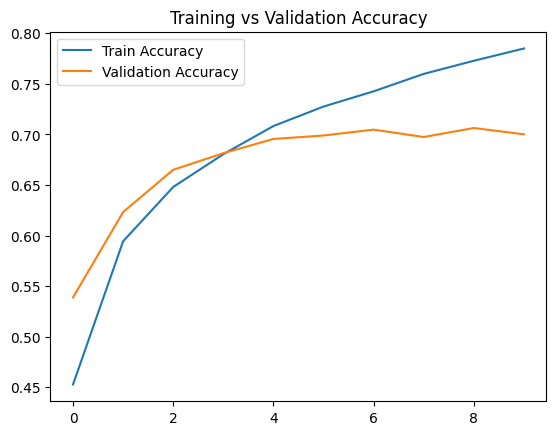

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


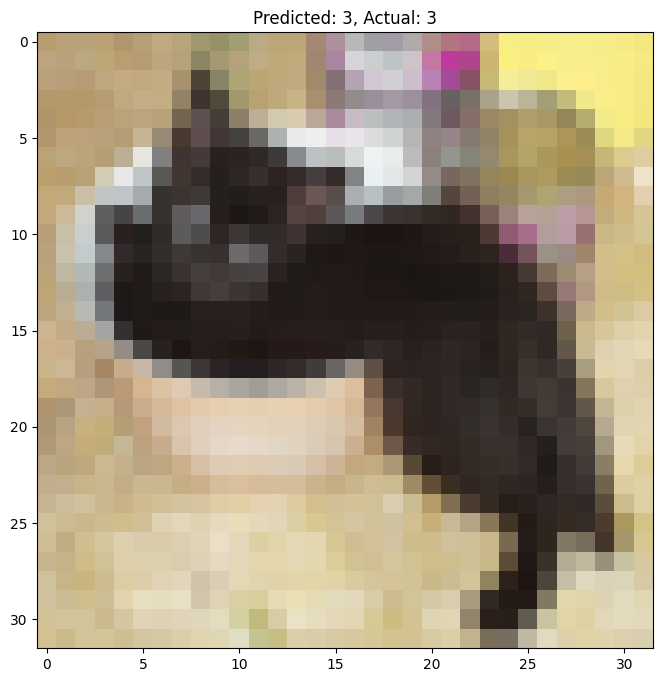

In [17]:
import numpy as np

predictions = model.predict(x_test)
index = np.random.randint(0, len(x_test))

plt.figure(figsize=(8, 8)) # Increase figure size
plt.imshow(x_test[index])
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index][0]}")
plt.show()